Шимолина Полина ИУ5-61Б

Задача №3.
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?
Для студентов групп ИУ5-61Б, ИУ5Ц-81Б - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

### Импортируем библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

### Импортируем данные

In [2]:
df = pd.read_csv("states_all_extended.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(1715, 266)

In [4]:
df.isnull().sum()

PRIMARY_KEY                0
STATE                      0
YEAR                       0
ENROLL                   491
TOTAL_REVENUE            440
                        ... 
G08_AM_A_MATHEMATICS    1655
G08_HP_A_READING        1701
G08_HP_A_MATHEMATICS    1702
G08_TR_A_READING        1574
G08_TR_A_MATHEMATICS    1570
Length: 266, dtype: int64

In [5]:
print(df.columns)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       ...
       'G08_HI_A_READING', 'G08_HI_A_MATHEMATICS', 'G08_AS_A_READING',
       'G08_AS_A_MATHEMATICS', 'G08_AM_A_READING', 'G08_AM_A_MATHEMATICS',
       'G08_HP_A_READING', 'G08_HP_A_MATHEMATICS', 'G08_TR_A_READING',
       'G08_TR_A_MATHEMATICS'],
      dtype='object', length=266)


Удаляем из названий колонок лишние пробелы если они есть

In [6]:
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ')
print(df.columns)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       ...
       'G08_HI_A_READING', 'G08_HI_A_MATHEMATICS', 'G08_AS_A_READING',
       'G08_AS_A_MATHEMATICS', 'G08_AM_A_READING', 'G08_AM_A_MATHEMATICS',
       'G08_HP_A_READING', 'G08_HP_A_MATHEMATICS', 'G08_TR_A_READING',
       'G08_TR_A_MATHEMATICS'],
      dtype='object', length=266)


C:\Users\Polina\AppData\Local\Temp\ipykernel_6636\2902703832.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.strip().str.replace(r'\s+', ' ')


### Масштабируем данные из колонок TOTAL_EXPENDITURE и TOTAL_REVENUE

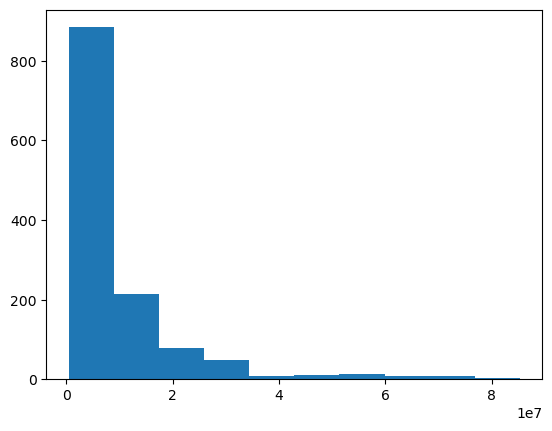

In [7]:
plt.hist(df['TOTAL_EXPENDITURE'])
plt.show()

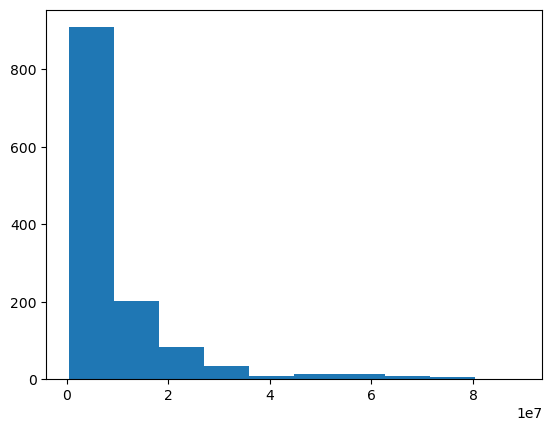

In [8]:
plt.hist(df['TOTAL_REVENUE'])
plt.show()

In [9]:
scaler = StandardScaler()
df['Scaled TOTAL_EXPENDITURE'] = scaler.fit_transform(df['TOTAL_EXPENDITURE'].values.reshape(-1, 1))
df['Scaled TOTAL_REVENUE'] = scaler.fit_transform(df['TOTAL_REVENUE'].values.reshape(-1, 1))

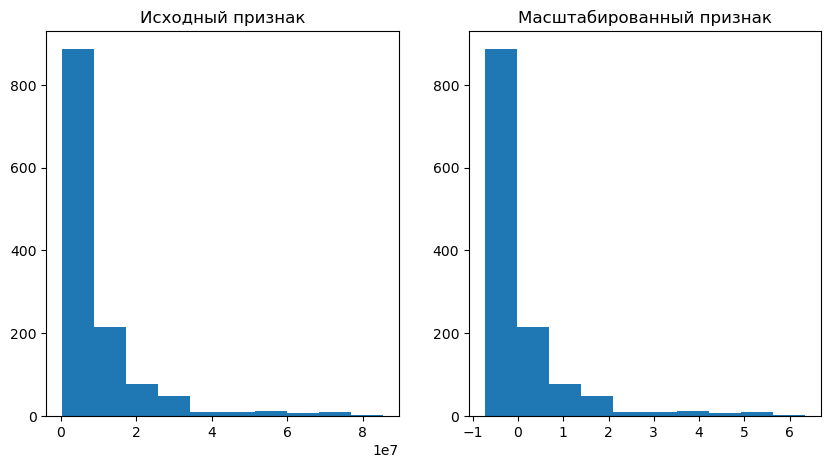

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(df['TOTAL_EXPENDITURE'])
axs[0].set_title('Исходный признак')
axs[1].hist(df['Scaled TOTAL_EXPENDITURE'])
axs[1].set_title('Масштабированный признак')
plt.show()

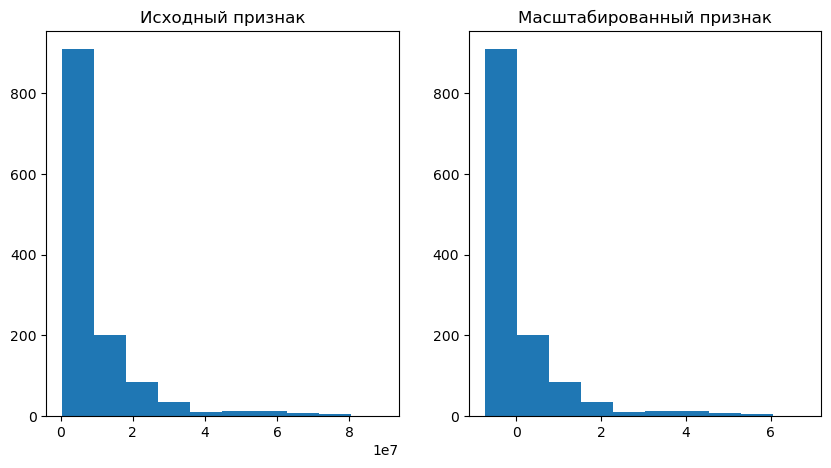

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(df['TOTAL_REVENUE'])
axs[0].set_title('Исходный признак')
axs[1].hist(df['Scaled TOTAL_REVENUE'])
axs[1].set_title('Масштабированный признак')
plt.show()

In [12]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS,Scaled TOTAL_EXPENDITURE,Scaled TOTAL_REVENUE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.546580,-0.546419
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.686828,-0.685023
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.484203,-0.497147
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.622553,-0.628676
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.495868,1.459632


### Label Encoder

In [13]:
le = LabelEncoder()
df['LE'] = le.fit_transform(df['STATE'])

In [14]:
le.classes_

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'DODEA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS',
       'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE',
       'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NATIONAL', 'NEBRASKA',
       'NEVADA', 'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
       'NORTH_CAROLINA', 'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

### One Hot Encoder

In [15]:
ohe = OneHotEncoder()
ohe_data = ohe.fit_transform(pd.DataFrame(df['STATE']).values)
ohe_frame = pd.DataFrame(ohe_data.toarray(),
columns=ohe.categories_)
ohe_frame

,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT_OF_COLUMBIA,DODEA,...,SOUTH_DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST_VIRGINIA,WISCONSIN,WYOMING
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df = pd.concat([df, ohe_frame], axis=1, join='inner')

In [17]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,"(SOUTH_DAKOTA,)","(TENNESSEE,)","(TEXAS,)","(UTAH,)","(VERMONT,)","(VIRGINIA,)","(WASHINGTON,)","(WEST_VIRGINIA,)","(WISCONSIN,)","(WYOMING,)"
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Строим график "Диаграмма рассеяния" для колонок Scaled TOTAL_REVENUE и Scaled TOTAL_EXPENDITURE

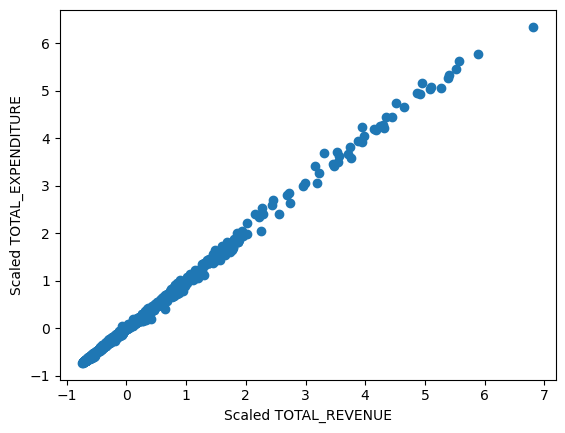

In [18]:
plt.scatter(df['Scaled TOTAL_REVENUE'], df['Scaled TOTAL_EXPENDITURE'])
plt.xlabel('Scaled TOTAL_REVENUE')
plt.ylabel('Scaled TOTAL_EXPENDITURE')
plt.show()

In [19]:
df.head(10).to_numpy()

array([['1992_ALABAMA', 'ALABAMA', 1992, ..., 0.0, 0.0, 0.0],
       ['1992_ALASKA', 'ALASKA', 1992, ..., 0.0, 0.0, 0.0],
       ['1992_ARIZONA', 'ARIZONA', 1992, ..., 0.0, 0.0, 0.0],
       ...,
       ['1992_DELAWARE', 'DELAWARE', 1992, ..., 0.0, 0.0, 0.0],
       ['1992_DISTRICT_OF_COLUMBIA', 'DISTRICT_OF_COLUMBIA', 1992, ...,
        0.0, 0.0, 0.0],
       ['1992_FLORIDA', 'FLORIDA', 1992, ..., 0.0, 0.0, 0.0]],
      dtype=object)

## Вывод
Для масштабирования данных я использовала метод StandardScaler, потому что он хорошо работает с нормально распределенными данными и не изменяет форму распределения данных.

Label Encoding преобразует категориальные значения в числовые, что упрощает работу с ними в алгоритмах машинного обучения, но может привести к некорректным результатам из-за создания линейной зависимости между категориями. One-Hot Encoding создает новые бинарные признаки для каждой категории, избегая проблемы линейной зависимости, но приводит к увеличению размерности данных.